Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 n

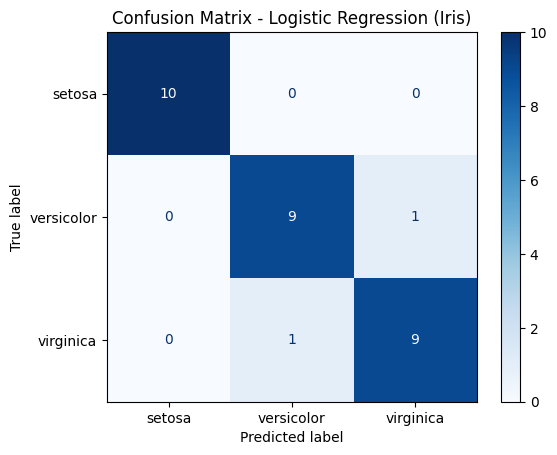


Model Evaluation Metrics:
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1-Score: 0.9333


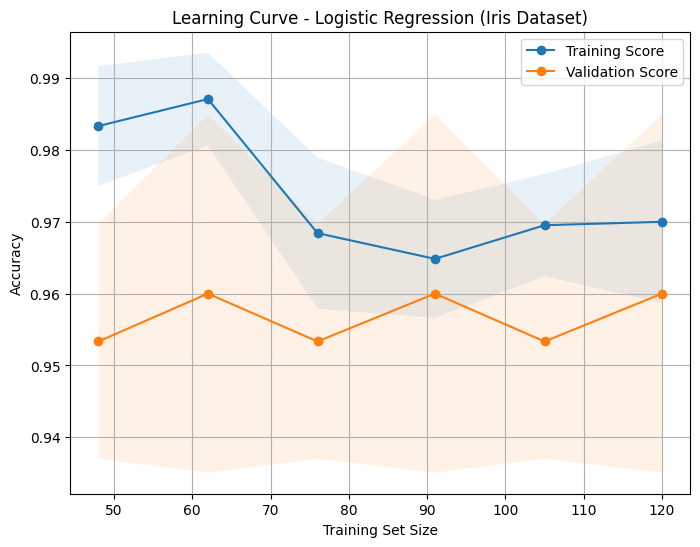


--- SUMMARY ---
Training Accuracy: 0.9583
Testing Accuracy: 0.9333
Cross-Validation Mean: 0.9533 ± 0.0452
Final Test Accuracy: 0.9333

--- MODEL COMPARISON ---
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.933333   0.933333  0.933333  0.933333
1        Decision Tree  0.933333   0.933333  0.933333  0.933333
2         SVM (Linear)  1.000000   1.000000  1.000000  1.000000


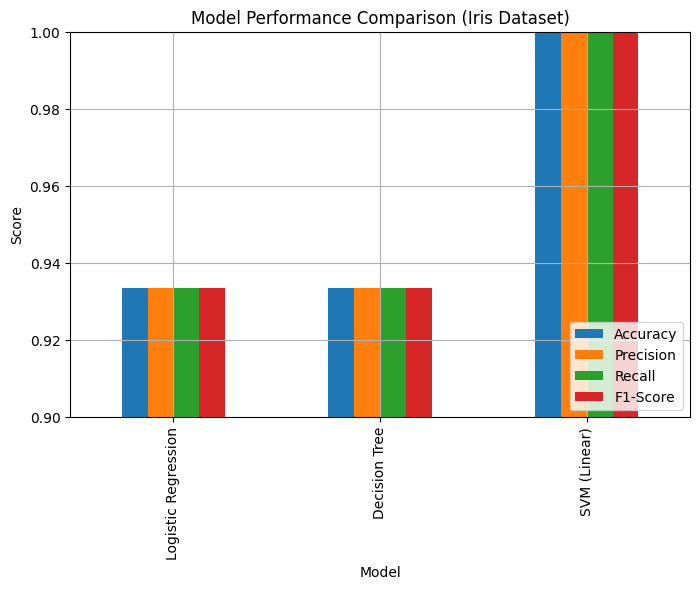

In [12]:
# ==========================================================
# MACHINE PROBLEM NO. 2: Evaluating Machine Learning Model Performance
# Dataset: Iris Dataset
# Model: Logistic Regression
# ==========================================================


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, ConfusionMatrixDisplay
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# ==========================================================
# 1. Load and Explore Dataset
# ==========================================================

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nClass Labels:", iris.target_names)

# ==========================================================
# 2. Data Preprocessing
# ==========================================================

print("\nMissing Values:\n", df.isnull().sum())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================================
# 3. Train-Test Split
# ==========================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# ==========================================================
# 4. Model Building – Logistic Regression
# ==========================================================

log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

train_acc = log_reg.score(X_train, y_train)
test_acc = log_reg.score(X_test, y_test)

print("\nTraining Accuracy:", round(train_acc, 4))
print("Testing Accuracy:", round(test_acc, 4))

# ==========================================================
# 5. Cross-Validation (5-Fold)
# ==========================================================

cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X_scaled, y, cv=cv_stratified)
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

print("\n5-Fold Cross Validation Scores:", cv_scores)
print("Mean CV Score:", round(cv_mean, 4))
print("Standard Deviation:", round(cv_std, 4))


with open("cross_validation.txt", "w") as f:
    f.write(f"Cross-Validation Scores: {cv_scores}\n")
    f.write(f"Mean CV Score: {cv_mean:.4f}\n")
    f.write(f"Standard Deviation: {cv_std:.4f}\n")

# ==========================================================
# 6. Confusion Matrix and Metrics
# ==========================================================

y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Iris)")
plt.savefig("confusion_matrix.png")
plt.show()


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("\nModel Evaluation Metrics:")
print("Accuracy:", round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall:", round(rec, 4))
print("F1-Score:", round(f1, 4))

# ==========================================================
# 7. Learning Curve Visualization
# ==========================================================

from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle


X_shuffled, y_shuffled = shuffle(X_scaled, y, random_state=42)

cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


train_sizes = np.linspace(0.4, 1.0, 6)


train_sizes, train_scores, test_scores = learning_curve(
    log_reg,
    X_shuffled,
    y_shuffled,
    cv=cv_stratified,
    scoring="accuracy",
    train_sizes=train_sizes,
    n_jobs=-1,
    error_score=np.nan
)


train_mean = np.nanmean(train_scores, axis=1)
test_mean = np.nanmean(test_scores, axis=1)
train_std = np.nanstd(train_scores, axis=1)
test_std = np.nanstd(test_scores, axis=1)


plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title("Learning Curve - Logistic Regression (Iris Dataset)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.savefig("learning_curve.png")
plt.show()


# ==========================================================
# 8. Summary of Results
# ==========================================================

print("\n--- SUMMARY ---")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")
print(f"Cross-Validation Mean: {cv_mean:.4f} ± {cv_std:.4f}")
print(f"Final Test Accuracy: {acc:.4f}")

# ==========================================================
# 9. OPTIONAL CHALLENGE (+10 pts)
# Compare Logistic Regression with Decision Tree and SVM
# ==========================================================

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='weighted')
dt_rec = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')


svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

svm_acc = accuracy_score(y_test, svm_pred)
svm_prec = precision_score(y_test, svm_pred, average='weighted')
svm_rec = recall_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')


comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "SVM (Linear)"],
    "Accuracy": [acc, dt_acc, svm_acc],
    "Precision": [prec, dt_prec, svm_prec],
    "Recall": [rec, dt_rec, svm_rec],
    "F1-Score": [f1, dt_f1, svm_f1]
})

print("\n--- MODEL COMPARISON ---")
print(comparison)

comparison.set_index("Model").plot(kind="bar", figsize=(8,5), grid=True)
plt.title("Model Performance Comparison (Iris Dataset)")
plt.ylabel("Score")
plt.ylim(0.9, 1.0)
plt.legend(loc="lower right")
plt.show()